# Genome Size Vs Complexity

### Imports

In [31]:
from logic_gates import run_evolution_strong_selection, run_random_walk, Circuit
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
from tqdm.notebook import tqdm

Setting up some utility functions and an object to track isomorphisms

In [32]:
def construct_genome(size: int) -> list:
    genome = []
    for i in range(int(size / 4)):
        genome += [0, 0, 1, 1, 2, 3, 4, 4]
    for i in range(max(0, size % 4)):
        genome += [0, 1]
    genome += [5]
    print(genome)
    return genome

class IsomorphismCounter:

    def __init__(self):
        self.counter = defaultdict(Counter)

    def add(self, network, size: int):
        for key in self.counter:
            if key.is_isomorphic(network, pruned=True):
                self.counter[key][size] += 1
                self.counter[key]["total"] += 1
                return key
        self.counter[network][size] += 1
        self.counter[network]["total"] += 1
        return network

    def get_networks(self):
        return self.counter.keys()

    def get_number_by_size(self, size: int):
        return {key: value[size] for key, value in self.counter.items()}

    def get_number_networks_total(self):
        return {key: value['total'] for key, value in self.counter.items()}

Goal Function

In [33]:
def goal_function(x: [bool]) -> bool:
    return x[0] or x[1]

Now the actual simulation

[0, 0, 1, 1, 2, 3, 4, 4, 5]
4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:135.0
Mean:1823.54
STD:3411.0675525999186
[0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 5]
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:135.5
Mean:587.62
STD:1463.095866852203
[0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 5]
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:133.0
Mean:811.7
STD:2085.479558758608
[0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 0, 1, 5]
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:228.5
Mean:702.0
STD:1394.2218403109314
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 5]
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:80.5
Mean:348.55
STD:761.5014691384384
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 5]
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:93.0
Mean:249.7
STD:469.78236450509723
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 5]
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:133.0
Mean:259.11
STD:348.28513878717246
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 0, 1, 5]
11


  0%|          | 0/100 [00:00<?, ?it/s]

Median:244.0
Mean:650.12
STD:1424.2142133822424
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 5]
12


  0%|          | 0/100 [00:00<?, ?it/s]

Median:150.5
Mean:273.22
STD:362.71908083253635
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 5]
13


  0%|          | 0/100 [00:00<?, ?it/s]

Median:123.0
Mean:232.21
STD:327.48753548799374
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 5]
14


  0%|          | 0/100 [00:00<?, ?it/s]

Median:142.5
Mean:318.6
STD:530.1815538096362


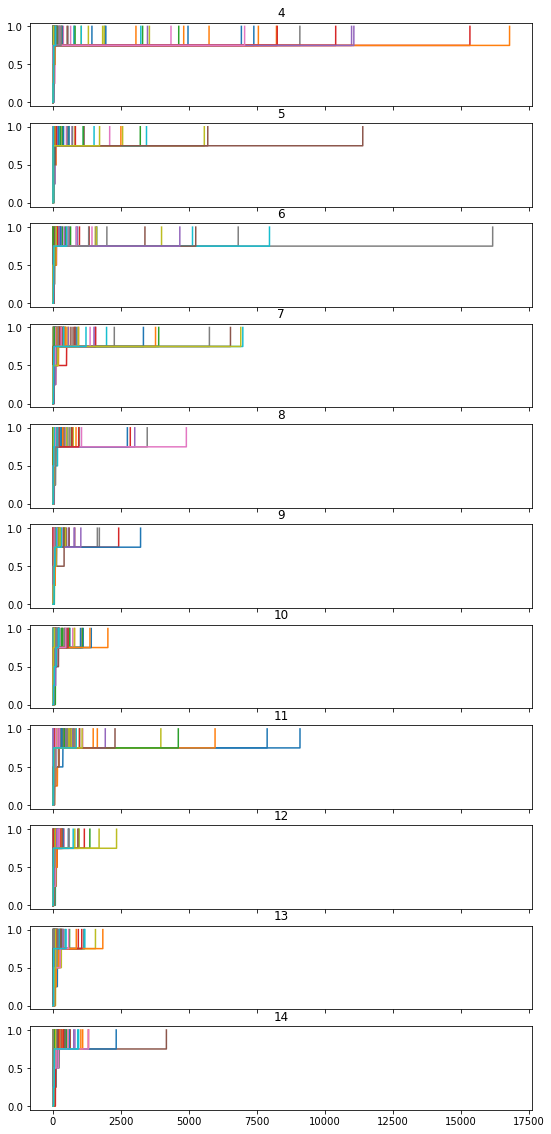

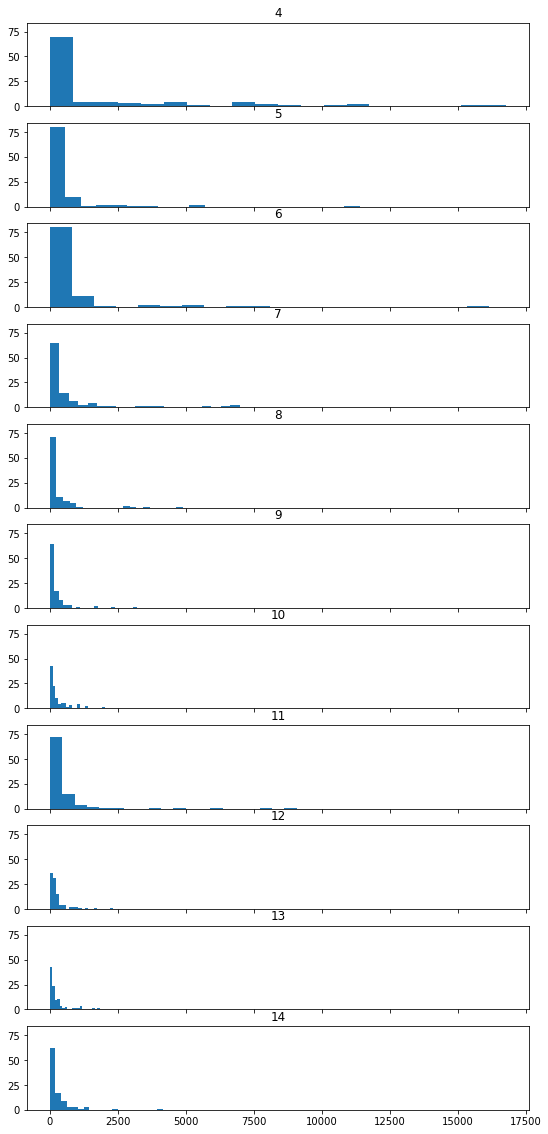

In [34]:
sizes = [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_evolution_strong_selection(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter.add(circuits[-1], size)
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

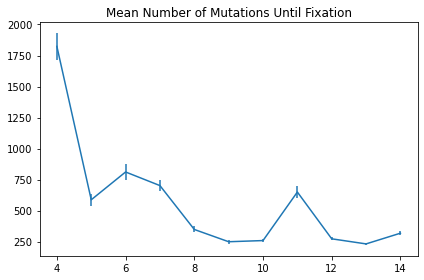

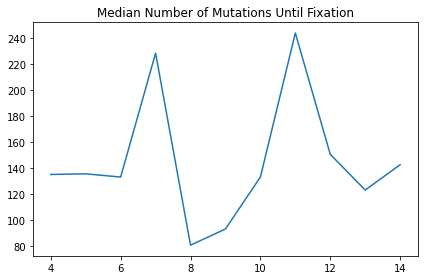

In [35]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Maybe this can in some way be connected to the fact that adding more area for the binding site (more flexibility) leads to a greater chance of evolution. If I understood that correctly the other day.

Counter({'total': 41, 7: 8, 4: 5, 6: 5, 9: 5, 5: 4, 13: 4, 8: 3, 10: 2, 11: 2, 12: 2, 14: 1})


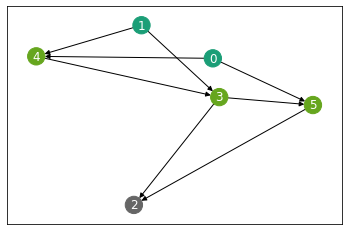

Counter({'total': 161, 4: 38, 5: 29, 6: 25, 7: 21, 9: 14, 10: 12, 8: 8, 11: 7, 12: 3, 14: 3, 13: 1})


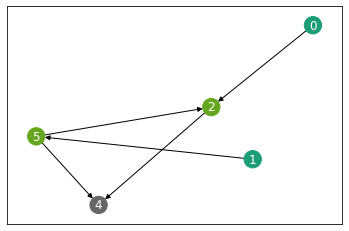

Counter({'total': 436, 13: 45, 9: 44, 5: 43, 10: 42, 14: 40, 4: 39, 7: 38, 8: 38, 12: 38, 6: 37, 11: 32})


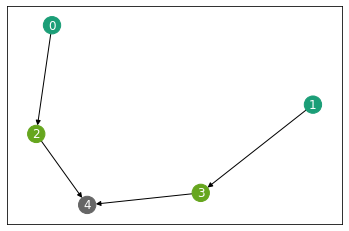

Counter({'total': 21, 4: 5, 5: 4, 6: 3, 8: 3, 10: 2, 12: 2, 7: 1, 14: 1})


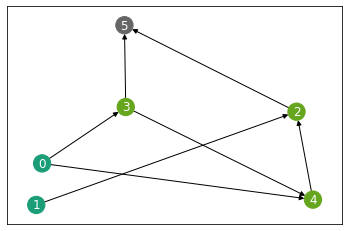

Counter({'total': 71, 7: 16, 5: 11, 4: 9, 6: 8, 11: 8, 14: 5, 8: 4, 10: 4, 12: 3, 13: 2, 9: 1})


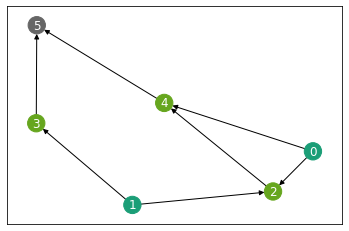

Counter({'total': 25, 6: 8, 5: 6, 4: 3, 10: 3, 7: 2, 8: 1, 11: 1, 12: 1})


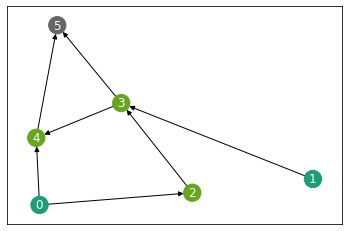

Counter({'total': 30, 14: 6, 10: 5, 12: 5, 6: 3, 11: 3, 13: 3, 4: 1, 5: 1, 7: 1, 8: 1, 9: 1})


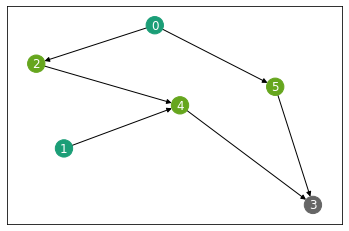

Counter({'total': 5, 6: 2, 5: 1, 9: 1, 14: 1})


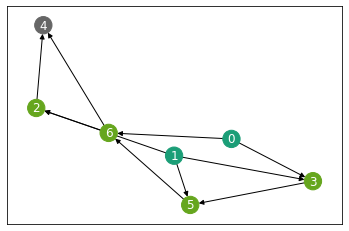

Counter({'total': 14, 10: 4, 9: 3, 14: 3, 11: 2, 6: 1, 13: 1})


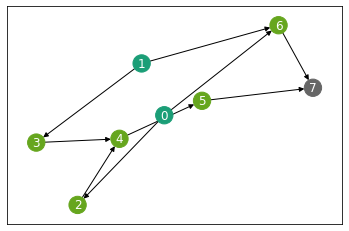

Counter({'total': 15, 9: 4, 11: 3, 7: 2, 13: 2, 6: 1, 10: 1, 12: 1, 14: 1})


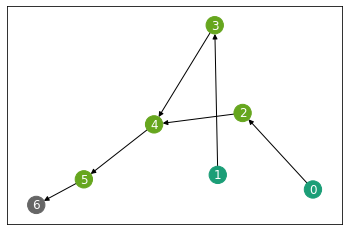

Counter({'total': 24, 8: 5, 11: 4, 14: 4, 10: 3, 12: 3, 7: 2, 9: 2, 13: 1})


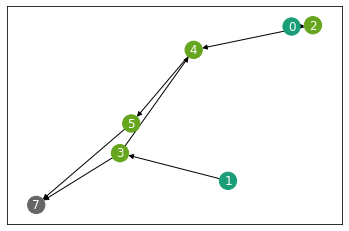

Counter({'total': 19, 8: 6, 13: 5, 9: 2, 12: 2, 14: 2, 10: 1, 11: 1})


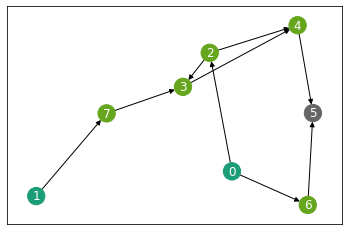

Counter({'total': 13, 8: 4, 12: 3, 10: 2, 11: 2, 13: 2})


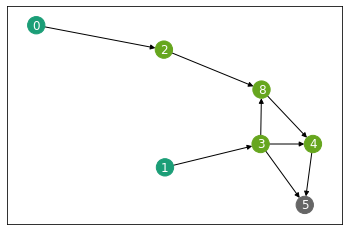

Counter({'total': 6, 9: 2, 14: 2, 8: 1, 12: 1})


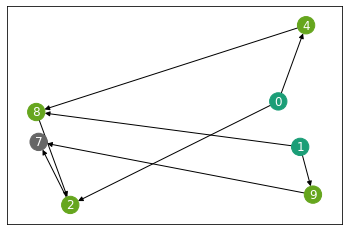

Counter({'total': 6, 14: 3, 8: 1, 9: 1, 11: 1})


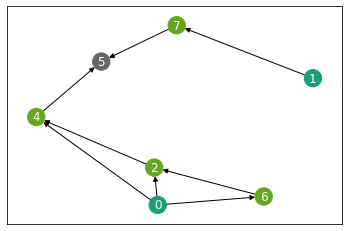

Counter({'total': 29, 12: 8, 14: 7, 13: 6, 8: 5, 10: 2, 11: 1})


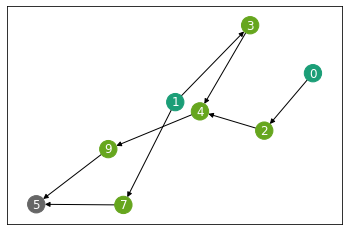

Counter({'total': 5, 8: 2, 9: 2, 14: 1})


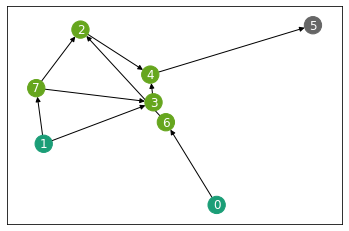

In [36]:
network_counter = isomorphism_counter.counter
for key, value in network_counter.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [37]:
list_unique_networks = list(isomorphism_counter.counter.keys())
list_unique_networks[:5]

[[5, 3, 4, 1, 1, 0, 0, 3, 2],
 [5, 0, 4, 1, 2, 5, 1, 1, 4],
 [0, 0, 1, 1, 2, 3, 4, 4, 4],
 [1, 4, 0, 0, 0, 3, 3, 2, 5],
 [1, 0, 1, 1, 2, 0, 4, 3, 5]]

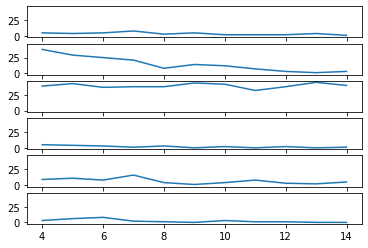

In [38]:
figs, axs = plt.subplots(6, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks[:6]):
    ax.plot(sizes, [isomorphism_counter.get_number_by_size(size)[network] for size in sizes])

In [39]:
len(isomorphism_counter.counter)

155

Now to test how unique this behavior is via a random walk

[0, 0, 1, 1, 2, 3, 4, 4, 5]
4


  0%|          | 0/100 [00:00<?, ?it/s]

Median:109.0
Mean:150.34
STD:158.7163646257058
[0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 5]
5


  0%|          | 0/100 [00:00<?, ?it/s]

Median:74.5
Mean:122.4
STD:137.9309972413743
[0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 5]
6


  0%|          | 0/100 [00:00<?, ?it/s]

Median:72.0
Mean:121.5
STD:151.80668628225834
[0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 0, 1, 5]
7


  0%|          | 0/100 [00:00<?, ?it/s]

Median:56.5
Mean:81.82
STD:79.3608694508824
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 5]
8


  0%|          | 0/100 [00:00<?, ?it/s]

Median:81.0
Mean:110.42
STD:102.91736296660541
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 5]
9


  0%|          | 0/100 [00:00<?, ?it/s]

Median:63.0
Mean:96.44
STD:100.46405526356179
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 5]
10


  0%|          | 0/100 [00:00<?, ?it/s]

Median:72.5
Mean:109.89
STD:115.0754443832393
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 0, 1, 5]
11


  0%|          | 0/100 [00:00<?, ?it/s]

Median:82.5
Mean:104.51
STD:101.91589620858957
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 5]
12


  0%|          | 0/100 [00:00<?, ?it/s]

Median:71.0
Mean:104.66
STD:97.26070326704408
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 5]
13


  0%|          | 0/100 [00:00<?, ?it/s]

Median:80.0
Mean:115.49
STD:111.60990054650169
[0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 0, 1, 1, 2, 3, 4, 4, 0, 1, 0, 1, 5]
14


  0%|          | 0/100 [00:00<?, ?it/s]

Median:77.5
Mean:117.99
STD:126.93955214983234


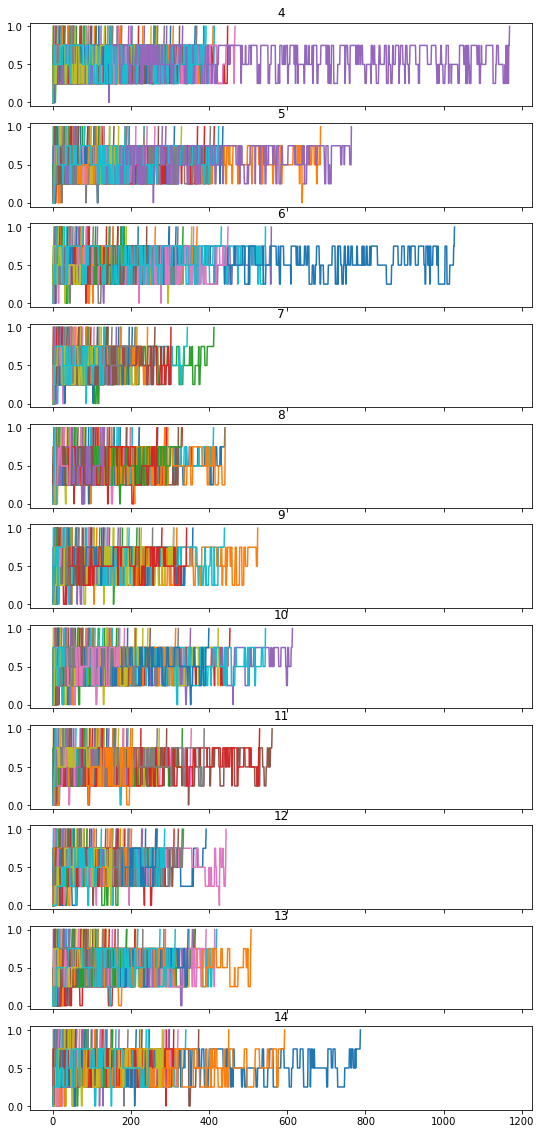

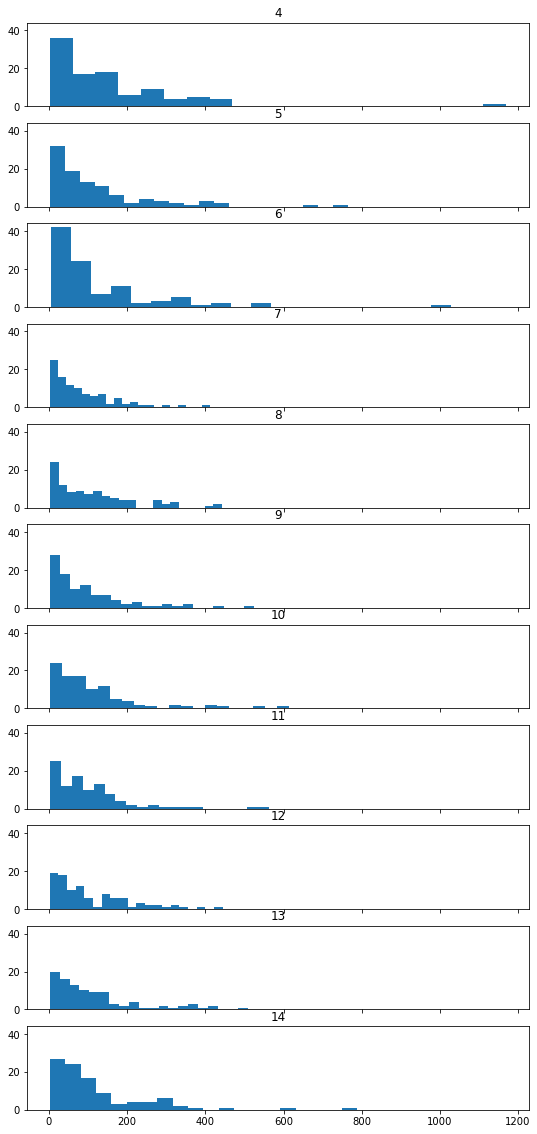

In [40]:
fig_trajectory, ax_trajectories = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
fig_histogram, ax_histograms = plt.subplots(len(sizes), 1, sharex=True, sharey=True, figsize=(9, 20))
means = []
medians = []
stds = []
isomorphism_counter_random_walk = IsomorphismCounter()
num_trials = 100
for size, ax_trajectory, ax_histogram in zip(sizes, ax_trajectories, ax_histograms):
    ax_trajectory.set_title(size)
    ax_histogram.set_title(size)
    initial_circuit = Circuit(2, construct_genome(size))
    total_times = []
    print(size)
    for i in tqdm(range(num_trials)):
        time, circuits, fitness = run_random_walk(goal_function, 1000, 0.1, initial_circuit, 1000000)
        total_times.append(len(time))
        ax_trajectory.plot(fitness)
        isomorphism_counter_random_walk.add(circuits[-1], str(size) + " Random Walk")
    total_times_array = np.array(total_times)
    medians.append(np.median(total_times_array))
    print("Median:" + str(medians[-1]))
    means.append(total_times_array.mean())
    print("Mean:" + str(means[-1]))
    stds.append(total_times_array.std())
    print("STD:" + str(stds[-1]))
    ax_histogram.hist(total_times, 20)
fig_trajectory.savefig('trajectories.png', dpi=1200)
fig_histogram.savefig('histogram_fixations100.png')
plt.show()

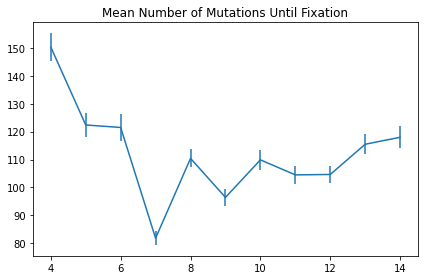

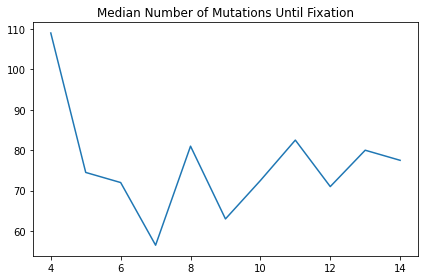

In [41]:
fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=means, yerr=np.array(stds)/np.sqrt(1000))
ax.set_title("Mean Number of Mutations Until Fixation")
plt.show()

fig, ax = plt.subplots(1, 1, tight_layout=True)
ax.errorbar(x=sizes, y=medians)
ax.set_title("Median Number of Mutations Until Fixation")
plt.show()

Counter({'total': 271, '4 Random Walk': 64, '5 Random Walk': 40, '6 Random Walk': 40, '7 Random Walk': 30, '8 Random Walk': 28, '10 Random Walk': 17, '9 Random Walk': 16, '13 Random Walk': 13, '11 Random Walk': 11, '12 Random Walk': 6, '14 Random Walk': 6})


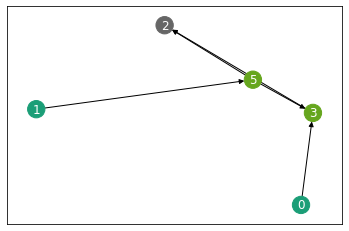

Counter({'total': 33, '5 Random Walk': 6, '7 Random Walk': 6, '8 Random Walk': 5, '4 Random Walk': 3, '11 Random Walk': 3, '12 Random Walk': 3, '14 Random Walk': 3, '9 Random Walk': 2, '6 Random Walk': 1, '10 Random Walk': 1})


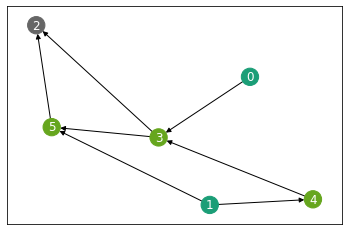

Counter({'total': 103, '5 Random Walk': 15, '12 Random Walk': 13, '9 Random Walk': 12, '4 Random Walk': 11, '11 Random Walk': 11, '7 Random Walk': 10, '6 Random Walk': 8, '10 Random Walk': 8, '13 Random Walk': 8, '14 Random Walk': 4, '8 Random Walk': 3})


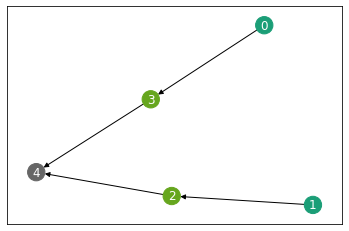

Counter({'total': 26, '5 Random Walk': 4, '4 Random Walk': 3, '6 Random Walk': 3, '7 Random Walk': 3, '10 Random Walk': 3, '12 Random Walk': 3, '13 Random Walk': 3, '8 Random Walk': 2, '9 Random Walk': 1, '14 Random Walk': 1})


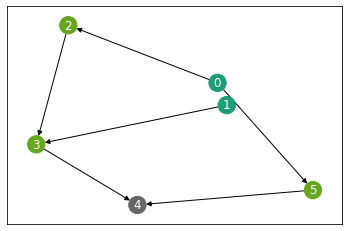

Counter({'total': 52, '6 Random Walk': 9, '7 Random Walk': 8, '9 Random Walk': 6, '4 Random Walk': 5, '5 Random Walk': 5, '8 Random Walk': 4, '13 Random Walk': 4, '14 Random Walk': 4, '11 Random Walk': 3, '12 Random Walk': 3, '10 Random Walk': 1})


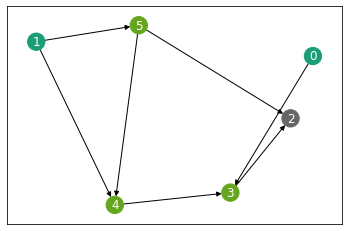

Counter({'total': 77, '7 Random Walk': 12, '6 Random Walk': 11, '5 Random Walk': 10, '8 Random Walk': 9, '4 Random Walk': 8, '11 Random Walk': 6, '14 Random Walk': 6, '9 Random Walk': 5, '10 Random Walk': 4, '13 Random Walk': 4, '12 Random Walk': 2})


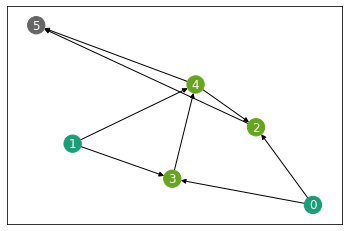

Counter({'total': 51, '5 Random Walk': 7, '9 Random Walk': 7, '11 Random Walk': 7, '4 Random Walk': 6, '6 Random Walk': 6, '7 Random Walk': 5, '8 Random Walk': 5, '13 Random Walk': 3, '10 Random Walk': 2, '12 Random Walk': 2, '14 Random Walk': 1})


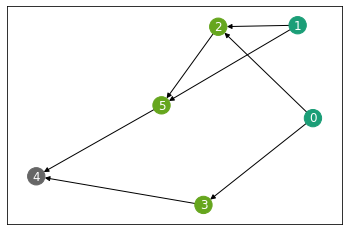

Counter({'total': 12, '7 Random Walk': 3, '11 Random Walk': 2, '12 Random Walk': 2, '14 Random Walk': 2, '5 Random Walk': 1, '6 Random Walk': 1, '13 Random Walk': 1})


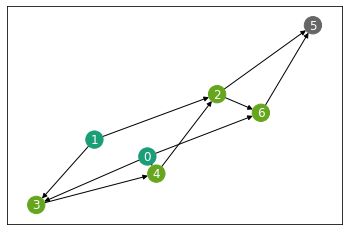

Counter({'total': 11, '5 Random Walk': 2, '6 Random Walk': 2, '12 Random Walk': 2, '13 Random Walk': 2, '7 Random Walk': 1, '8 Random Walk': 1, '11 Random Walk': 1})


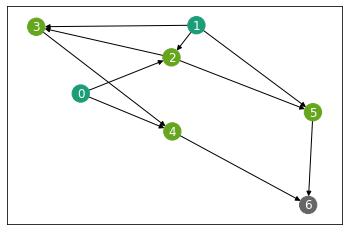

Counter({'total': 5, '10 Random Walk': 2, '5 Random Walk': 1, '8 Random Walk': 1, '13 Random Walk': 1})


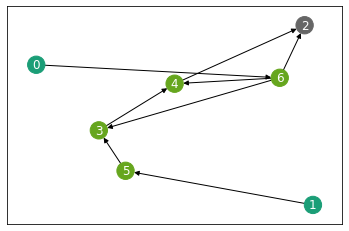

Counter({'total': 5, '10 Random Walk': 2, '5 Random Walk': 1, '6 Random Walk': 1, '8 Random Walk': 1})


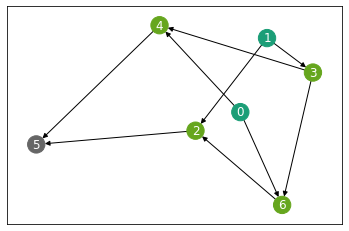

Counter({'total': 6, '6 Random Walk': 2, '7 Random Walk': 1, '8 Random Walk': 1, '9 Random Walk': 1, '14 Random Walk': 1})


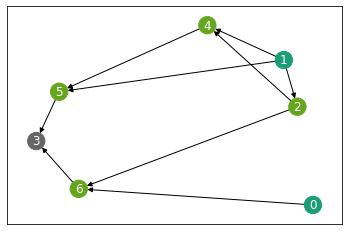

Counter({'total': 6, '6 Random Walk': 1, '7 Random Walk': 1, '9 Random Walk': 1, '11 Random Walk': 1, '12 Random Walk': 1, '13 Random Walk': 1})


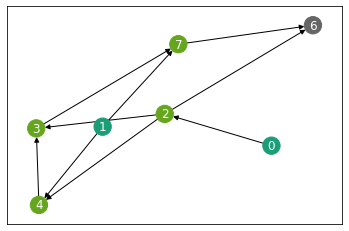

Counter({'total': 6, '10 Random Walk': 2, '6 Random Walk': 1, '7 Random Walk': 1, '9 Random Walk': 1, '11 Random Walk': 1})


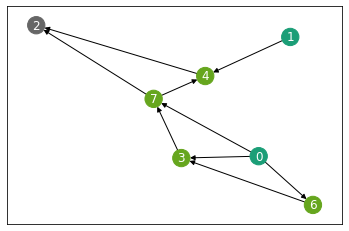

Counter({'total': 7, '11 Random Walk': 4, '7 Random Walk': 3})


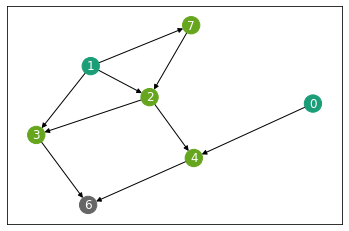

Counter({'total': 5, '9 Random Walk': 2, '7 Random Walk': 1, '12 Random Walk': 1, '14 Random Walk': 1})


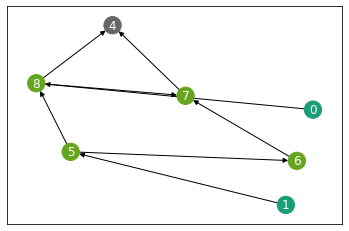

Counter({'total': 5, '9 Random Walk': 2, '12 Random Walk': 2, '7 Random Walk': 1})


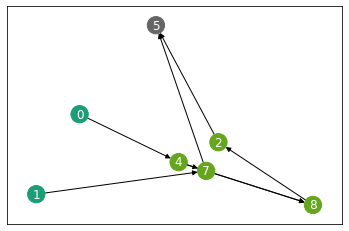

Counter({'total': 8, '8 Random Walk': 2, '9 Random Walk': 2, '14 Random Walk': 2, '10 Random Walk': 1, '12 Random Walk': 1})


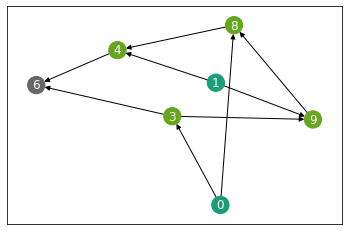

Counter({'total': 6, '12 Random Walk': 2, '8 Random Walk': 1, '9 Random Walk': 1, '13 Random Walk': 1, '14 Random Walk': 1})


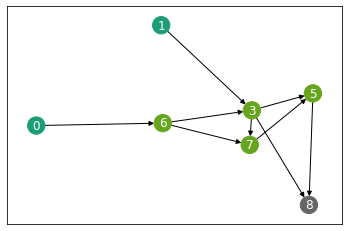

In [42]:
network_counter_random_walk = isomorphism_counter_random_walk.counter
for key, value in network_counter_random_walk.items():
    if value['total'] > 4:
        print(value)
        key.plot_network(prune=True)
        plt.show()

In [43]:
list_unique_networks_random_walk = list(isomorphism_counter_random_walk.counter.keys())
list_unique_networks_random_walk[:5]

[[5, 3, 0, 5, 5, 3, 1, 1, 2],
 [5, 3, 0, 4, 1, 1, 1, 3, 2],
 [1, 1, 0, 0, 3, 2, 4, 2, 4],
 [0, 0, 2, 1, 3, 5, 0, 0, 4],
 [5, 3, 4, 0, 1, 5, 1, 1, 2]]

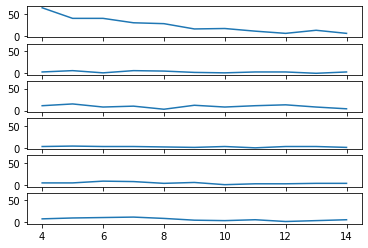

In [44]:
figs, axs = plt.subplots(6, 1, sharex=True, sharey=True)
for ax, network in zip(axs, list_unique_networks_random_walk):
    ax.plot(sizes, [isomorphism_counter_random_walk.get_number_by_size(str(size) + " Random Walk")[network] for size in sizes])